# Homework 4 solution

### 1- [50 pt]
Part a) Use the churn data set. Except for the Account Length, VMail Message, Day Mins, Day Calls, Eve Mins, Night Mins, Intl Mins, Intl Calls, CustServ Calls, Intl Plan, and Churn, drop the remaining columns from the dataset. Preprocess the data :

- Encode categorical features to numerical values using one-hot encoding.
- Use MinMaxScaler to transform your numerical attributes. One of the practices for training a Neural Network is to normalize your data to obtain a mean close to 0. Normalizing the data generally speeds up learning and leads to faster convergence.

Develop a 4-layer artificial neural network (ANN) and specifically a feed-forward multilayer perceptron (with sigmoid activations and MSE loss function) to perform binary classification to classify 'Churn' based on other variables. For this, split the data into training and testing set by 70:30 and use the training set for training the model and the test set to evaluate the model performance. Use sgd optimizer with no momentum and keep it simple. Please note that this is a binary classification problem so select the right number of nodes accordingly for the output layer. Use gridsearch to determine the number of nodes in the hidden layers. Train this toy model on a single iteration. Get the layer weights and loss from the model. You don’t need to use a callback since the current weights and loss will be available.

Part b) For the ANN in part a), calculate the first round of weight updates with back-propagation with paper and pencil for the two final layers (output to 2nd hidden layer; 2nd hidden layer to 1st hidden layer) for only the first sample.

Limit this calculation to only the weights corresponding to (i) the single output node and (ii) a single hidden node from the 2nd hidden layer. These weights also include the bias.

You can initialize all weights to zero except the weights that you are calculating, which can be initialized to 1. All nodes within the same layer will have the same weights and gradients.

Confirm that the numbers you calculated are the same as those produced by the code and provide both your calculations and the code output. Make sure that the loss function used in your hand calculation is the same as the one used in Keras.

If your calculations do not agree, find out why. Provide both calculations made by hand (scanned image and using a calculator/ computer to verify the results for each step is fine) and corresponding output from the program that shows that both are in agreement. Include all your assumptions in your answer.

For this problem, it is sufficient to calculate a single incoming weight and the bias for each layer. This is because we are initializing all layers of the network to non-random, identical values (per layer). As a result the gradients will be the same across each layer.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('churn.txt')

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

df.drop('State', axis=1, inplace=True)
df.drop('Phone', axis=1, inplace=True)
df.drop('Area Code', axis=1, inplace=True)
df.drop('VMail Plan', axis=1, inplace=True)
df.drop('Day Charge', axis=1, inplace=True)
df.drop('Eve Charge', axis=1, inplace=True)
df.drop('Eve Calls', axis=1, inplace=True)
df.drop('Night Charge', axis=1, inplace=True)
df.drop('Night Calls', axis=1, inplace=True)
df.drop('Intl Charge', axis=1, inplace=True)

df = pd.get_dummies(df, columns=["Churn?", "Int'l Plan"])
df.drop("Int'l Plan_no", axis=1, inplace=True)
df.drop('Churn?_False.', axis=1, inplace=True)

numerical_features = ["Account Length", "VMail Message", "Day Mins", "Day Calls", "Eve Mins", "Night Mins", "Intl Mins", "Intl Calls", "CustServ Calls"]
numerical_transform = MinMaxScaler()
numerical_processed = numerical_transform.fit_transform(df[numerical_features])
df.update(pd.DataFrame(numerical_processed, columns = numerical_features))

train, test = train_test_split(df, train_size=0.7, random_state=1)
X = train.drop('Churn?_True.', axis=1)
Y = train['Churn?_True.']
X_test = test.drop('Churn?_True.', axis=1)
Y_test = test['Churn?_True.']

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import *
from keras import initializers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from numpy.random import seed
from tensorflow import random
from sklearn.metrics import precision_score, recall_score

seed(1)
np.random.seed(1)
random.set_seed(1)
def create_model(layer1, layer2):
    model = keras.Sequential()
    model.add(layers.Dense(layer1, input_shape=(10,), activation='sigmoid'))
    model.add(layers.Dense(layer2, activation='sigmoid'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy']) 
    return model
model_t = KerasClassifier(build_fn=create_model, verbose=0)
param_grid = {'layer1':[3, 5, 7], 'layer2':[3, 5, 7]}
grid = GridSearchCV(estimator=model_t, param_grid=param_grid)
grid_result = grid.fit(X, Y)
print("Best score: " + str(grid_result.best_score_))
print("params: ")
print(grid_result.best_params_)

Best score: 0.8551148295402526
params: 
{'layer1': 3, 'layer2': 5}


In [4]:
model = keras.Sequential(
    [
        keras.Input(shape=(len(train.loc[:,train.columns != 'Churn?_True.'].columns))),
        layers.Dense(3, activation='sigmoid'),
        layers.Dense(5, activation='sigmoid'),
        layers.Dense(1, activation='sigmoid'),
    ]
)

model.compile(optimizer=keras.optimizers.SGD(learning_rate=.1), loss='mse',
              metrics=["accuracy",
                       keras.metrics.Precision(name="precision",thresholds=0.5),
                       keras.metrics.Recall(name="recall",thresholds=0.5)])

model.fit(X, Y, validation_data=(X_test, Y_test), epochs=1)

73/73 [==============================] - 4s 35ms/step - loss: 0.1817 - accuracy: 0.8516 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.1301 - val_accuracy: 0.8550 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00


weights:

In [5]:
model.layers[1].get_weights()

[array([[-0.48564863, -0.8750063 ,  0.27645668, -0.02057853, -0.5376615 ],
        [ 0.8608193 ,  0.41751823, -0.8442373 ,  0.04871762, -0.40842375],
        [ 0.31045994,  0.36976486, -0.5775    , -0.24325362, -0.39804554]],
       dtype=float32),
 array([ 0.10790335, -0.04034439, -0.04276812, -0.01417502,  0.07637643],
       dtype=float32)]

In [6]:
model.layers[2].get_weights()

[array([[-1.0135484 ],
        [ 0.178851  ],
        [ 0.26138812],
        [-0.01790236],
        [-0.74326897]], dtype=float32),
 array([-0.524312], dtype=float32)]

Part b) Solution:

Need to first train a model with the initialized weights, and on one training sample.

In [7]:
selected_model = keras.Sequential(
    [
        keras.Input(shape=(len(train.loc[:,train.columns != 'Churn?_True.'].columns))),
        layers.Dense(3, activation='sigmoid',
                        kernel_initializer=keras.initializers.Zeros(), #Initialize weights
                        bias_initializer=keras.initializers.Zeros()),
        layers.Dense(5, activation='sigmoid',
                        kernel_initializer=keras.initializers.Ones(),
                        bias_initializer=keras.initializers.Ones()),
        layers.Dense(1, activation='sigmoid',
                        kernel_initializer=keras.initializers.Ones(),
                        bias_initializer=keras.initializers.Ones()),
    ]
)

selected_model.compile(optimizer=keras.optimizers.SGD(learning_rate=.1), loss='mse',
              metrics=["accuracy",
                       keras.metrics.Precision(name="precision",thresholds=0.5),
                       keras.metrics.Recall(name="recall",thresholds=0.5)])

selected_model.summary()

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_141 (Dense)            (None, 3)                 33        
_________________________________________________________________
dense_142 (Dense)            (None, 5)                 20        
_________________________________________________________________
dense_143 (Dense)            (None, 1)                 6         
Total params: 59
Trainable params: 59
Non-trainable params: 0
_________________________________________________________________


In [8]:
selected_model.fit(X.iloc[:1], Y.iloc[:1], epochs=1, batch_size=1)


1/1 [==============================] - 1s 1s/step - loss: 0.9928 - accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00


In [9]:
selected_model.layers[1].get_weights()

[array([[0.9999749, 0.9999749, 0.9999749, 0.9999749, 0.9999749],
        [0.9999749, 0.9999749, 0.9999749, 0.9999749, 0.9999749],
        [0.9999749, 0.9999749, 0.9999749, 0.9999749, 0.9999749]],
       dtype=float32),
 array([0.99994975, 0.99994975, 0.99994975, 0.99994975, 0.99994975],
       dtype=float32)]

In [10]:
selected_model.layers[2].get_weights()

[array([[0.9993378],
        [0.9993378],
        [0.9993378],
        [0.9993378],
        [0.9993378]], dtype=float32),
 array([0.99928343], dtype=float32)]

For our hand calculations, we need to know what the actual class is:

In [11]:
Y.iloc[0]

0

See hand calculations below for forward and backwards pass.

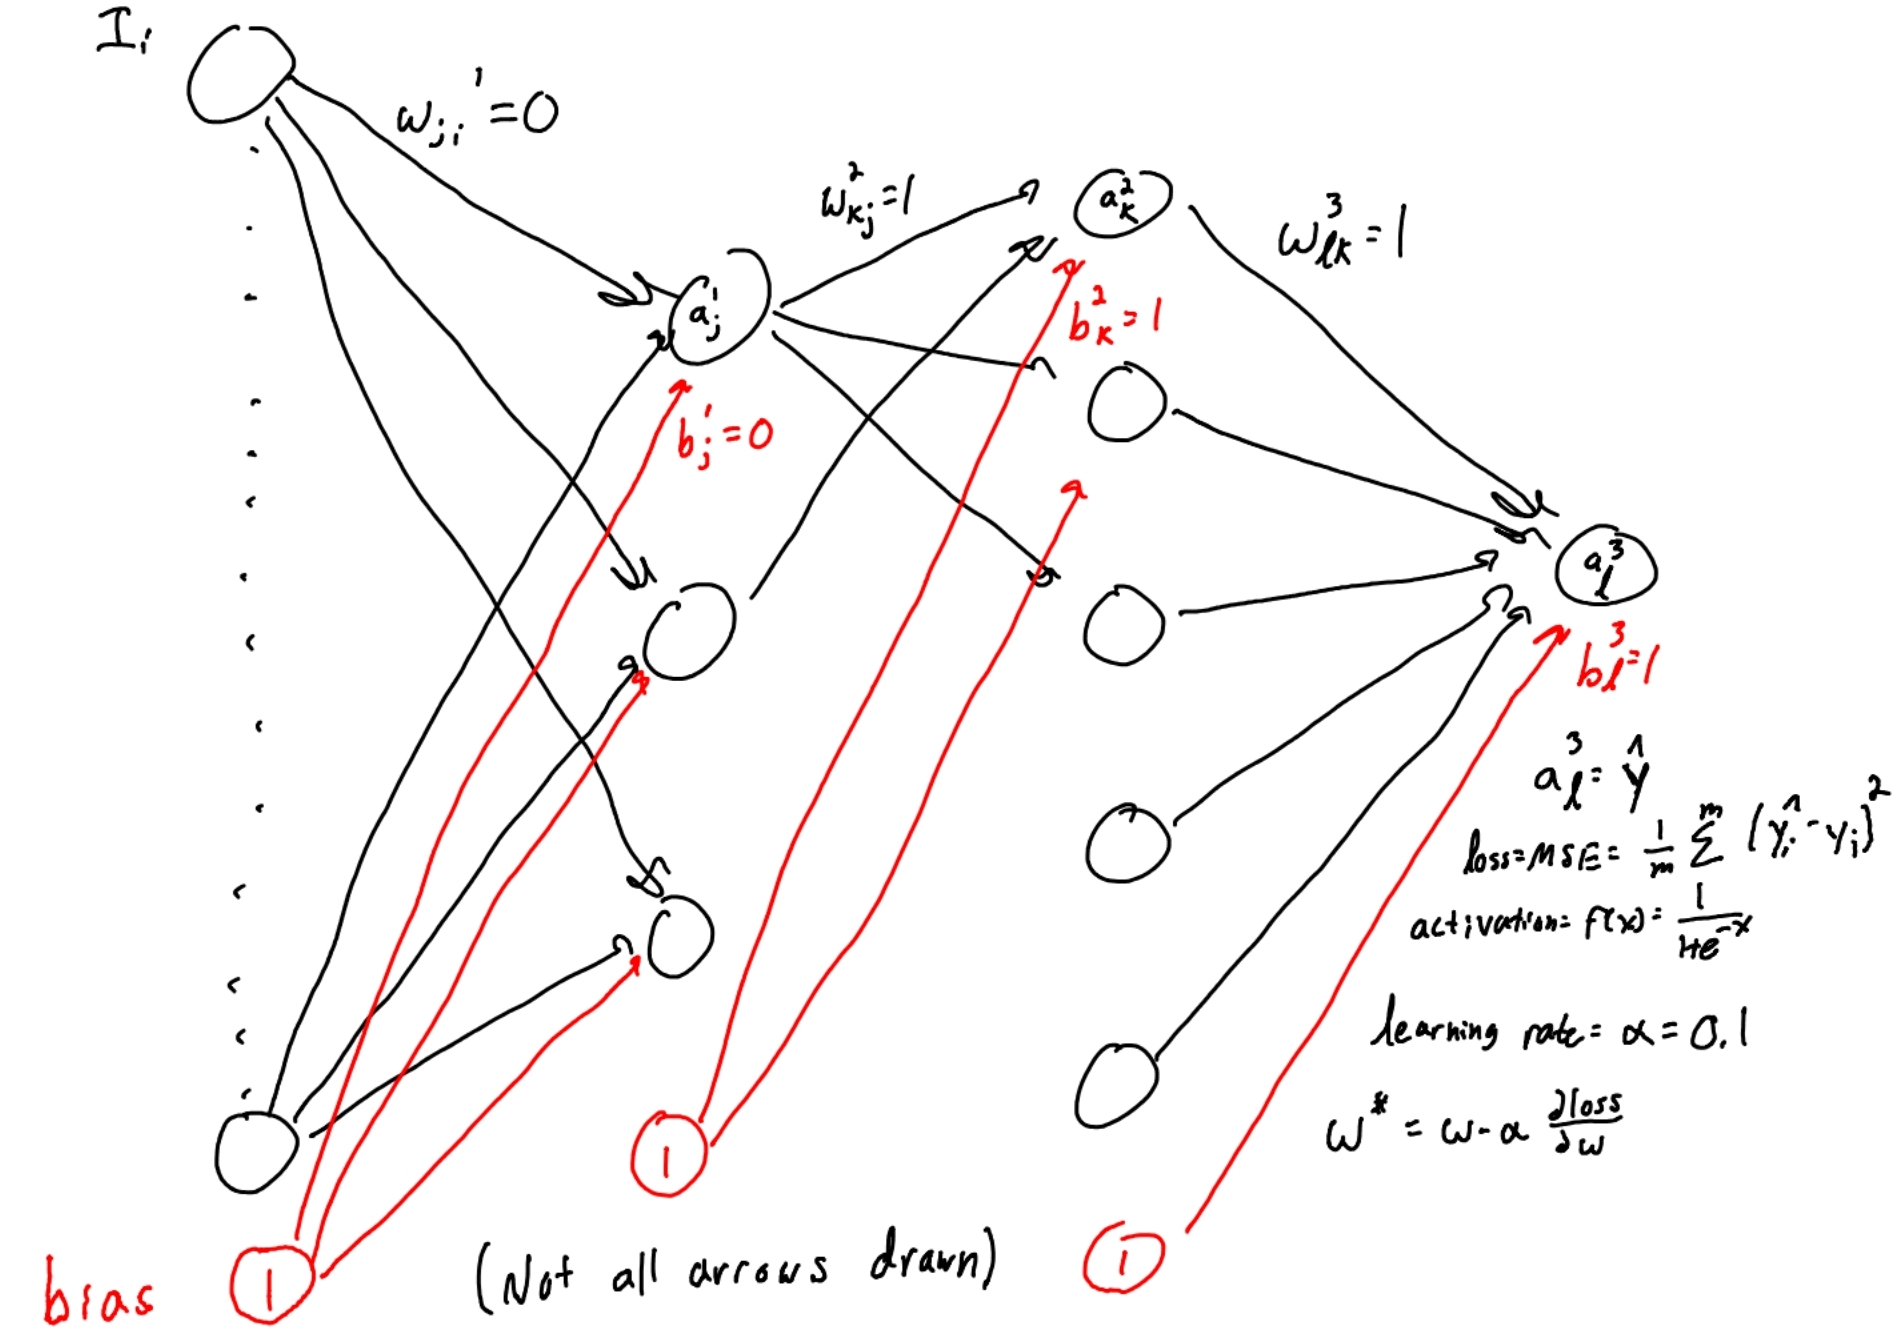

 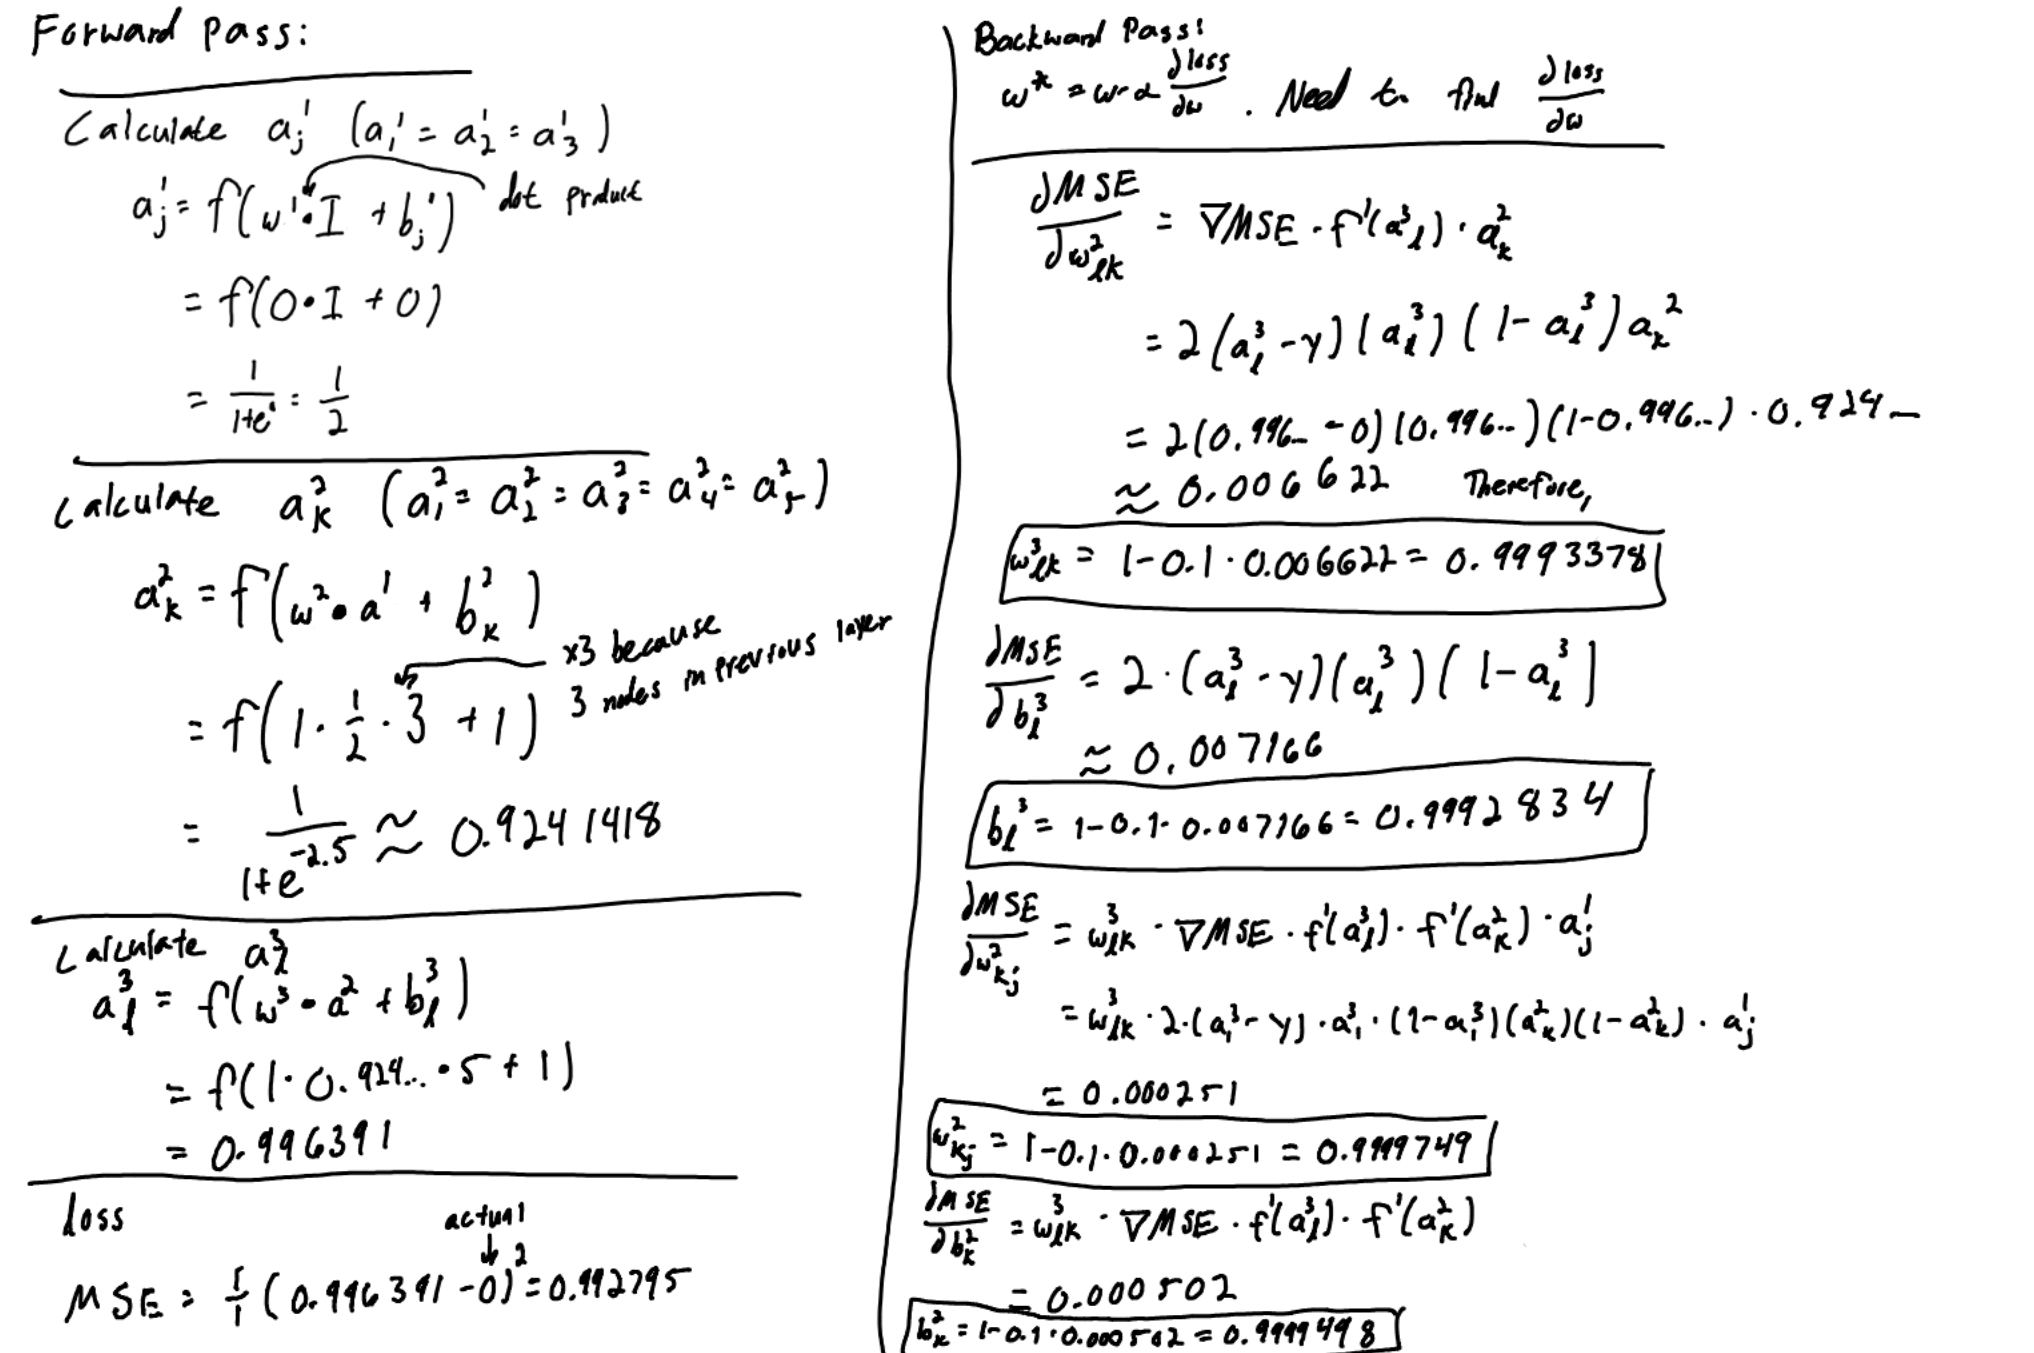

So the hand calculations and the code agree.

### 2- [20 pt]
Create 2 dummy input samples and use the ANN model which you trained in Q1a to classify the output. Include your code and the classified output.

Choose a random sample that is within the normalized range of the inputs. The other sample has values outside of the normalized range.

In [12]:
new_samples = [[0.78, 0.09, 0.393, 0.81, 0.11, 0.93, 0.57, 0.42, 0.66, 0.0],
              [1.1, 0.09, -0.2, 0.81, 0.11, 1.3, 0.57, 0.42, 1.12, 0.0]]

model.predict(new_samples)

array([[0.22699156],
       [0.22422287]], dtype=float32)

### 3- [20 pt] 
Change the hidden layer activation functions to ReLU, the output layer activation to softmax, and the loss function to cross-entropy. Is this a better choice?

In [13]:
model = keras.Sequential(
    [
        keras.Input(shape=(len(train.loc[:,train.columns != 'Churn?_True.'].columns))),
        layers.Dense(3, activation='relu'),
        layers.Dense(5, activation='relu'),
        layers.Dense(1, activation='softmax')
    ]
)

# using Adam as optimizer since it converges reliably, whereas SGD does not
model.compile(optimizer=keras.optimizers.Adam(learning_rate=.1), loss='binary_crossentropy',
              metrics=["accuracy",
                       keras.metrics.Precision(name="precision",thresholds=0.5),
                       keras.metrics.Recall(name="recall",thresholds=0.5),
                       keras.metrics.AUC(name="auc")])

model.summary()

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_144 (Dense)            (None, 3)                 33        
_________________________________________________________________
dense_145 (Dense)            (None, 5)                 20        
_________________________________________________________________
dense_146 (Dense)            (None, 1)                 6         
Total params: 59
Trainable params: 59
Non-trainable params: 0
_________________________________________________________________


In [14]:
training_weights = []
        
# basic example
history = model.fit(X, Y, validation_data=(X_test, Y_test), epochs=1)

# better: use a validation set
# history = model.fit(train.loc[:,train.columns != 'Churn'], train['Churn'], **fit_args, validation_split=0.8);

73/73 [==============================] - 3s 14ms/step - loss: 0.4590 - accuracy: 0.1484 - precision: 0.1484 - recall: 1.0000 - auc: 0.5000 - val_loss: 0.3945 - val_accuracy: 0.1450 - val_precision: 0.1450 - val_recall: 1.0000 - val_auc: 0.5000


In [15]:
{x:history.history[x][-1] for x in history.history.keys()}

{'loss': 0.41881686449050903,
 'accuracy': 0.1448778361082077,
 'precision': 0.1448778361082077,
 'recall': 1.0,
 'auc': 0.5,
 'val_loss': 0.3945021331310272,
 'val_accuracy': 0.14499999582767487,
 'val_precision': 0.14499999582767487,
 'val_recall': 1.0,
 'val_auc': 0.5}

No, this is not a better choice. The accuracy dropped considerably, and the loss is higher.

### 4- [10 pt]
Describe the trade-of between a large hidden layer and a small one. What are the benefits, what are the drawbacks? Also, describe the benefits and drawbacks of using a large or small values for learning rate in a NN. 

**Solution:**

- Large hidden layer size
    - more expressiveness to capture complex, nonlinear features
    - more complexity (fit and evaluation time)
    - more likely to overfit
    
- Large learning rate
    - Will converge faster (fewer iterations)
    - May not converge since it will overstep the minimum